### Problem 1: First Derivatives
Here you will evaluate the first derivative of the function:
$$f(x) = \sin{(2\pi x)}$$

Write a function to plot the first derivative of this function and the difference from the analytical using:

a. the *forward difference* algorithm for a given range $[x_i, x_f]$, step size $h$, and number of points $N$.  
  * Include the plots for $x_i=0$, $x_f=4$, $h=0.1$, $N=100$ in your write-up.  
  * Do you see any systematic shift in the result? Why or why not?  
  * How small does $h$ need to be to have an error less than $0.001$ everywhere?

b. the *central difference* algorithm for a given range $[x_i, x_f]$, step size $h$, and number of points $N$.  
  * Include the plots for $x_i=0$, $x_f=4$, $h=0.1$, $N=100$ in your write-up.  
  * Do you see any systematic shift in the result? Why or why not?  
  * How small does $h$ need to be to have an error less than $0.001$ everywhere?

c. the *extrapolated difference* method for a given range $[x_i, x_f]$, step size $h$, and number of points $N$.  
  * Include the plots for $x_i=0$, $x_f=4$, $h=0.1$, $N=100$ in your write-up.  
  * Do you see any systematic shift in the result? Why or why not?  
  * How small does $h$ need to be to have an error less than $0.001$ everywhere?  
  * Despite the improved precision, do you see any possible disadvantages of this method?
  
------

In [58]:
def F(x):
    return np.sin(2*np.pi*x)

Max Error, h =: 1e-05 0.000197367306935


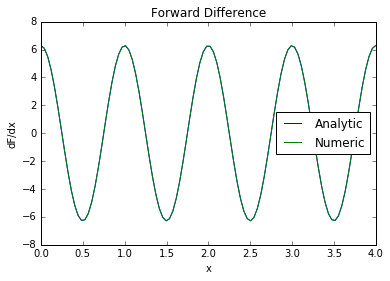

Max Error, h =: 0.1 1.95236118791


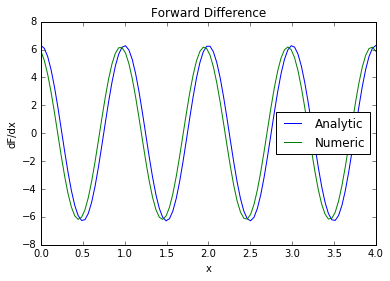

In [95]:
def forward_diff(f, x_min, x_max, h, N):
    x = np.linspace(x_min, x_max, N, h)
    y = [ ]
    
    for i in range(len(x)):
        diff_quotient = ( f(x[i] + h) - f(x[i]) ) / h
        y.append(diff_quotient)
    
    y = np.array(y)
    true_derivative = 2*np.pi*np.cos(2*np.pi*x)
    
    error = abs(true_derivative - y)
    print('Max Error, h =:', h, max(error))
    
    # The second argument here is the actual dF/dx function.
    plt.plot(x, true_derivative, label='Analytic')
    plt.plot(x, y, label='Numeric')
    plt.xlabel('x')
    plt.ylabel('dF/dx')
    plt.title('Forward Difference')
    plt.legend(loc='best')
    plt.show()
    
forward_diff(F, 0, 4, 0.00001, 100)
forward_diff(F, 0, 4, 0.1, 100)

Max Error, h =: 0.1 0.102845419681


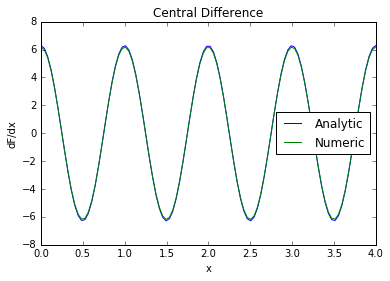

Max Error, h =: 0.01 0.00103349155432


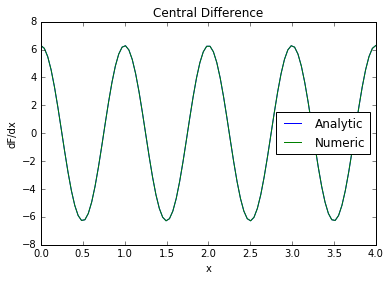

In [100]:
def central_diff(f, x_min, x_max, h, N, plot=False):
    x = np.linspace(x_min, x_max, N, h)
    y = [ ]
    
    for i in range(len(x)):
        diff_quotient = ( f(x[i] + h/2) - f(x[i] - h/2) ) / h
        y.append(diff_quotient)
        
    y = np.array(y)
    true_derivative = 2*np.pi*np.cos(2*np.pi*x)
    
    error = abs(true_derivative - y)
    
    if plot:
        print('Max Error, h =:', h, max(error))
        # The second argument here is the actual dF/dx function.
        plt.plot(x, true_derivative, label='Analytic')
        plt.plot(x, y, label='Numeric')
        plt.xlabel('x')
        plt.ylabel('dF/dx')
        plt.title('Central Difference')
        plt.legend(loc='best')
        plt.show()
        
    else:
        return y

central_diff(F, 0, 4, 0.1, 100, True)
central_diff(F, 0, 4, 0.01, 100, True)

Max Error, h =: 0.1 0.000127134200255


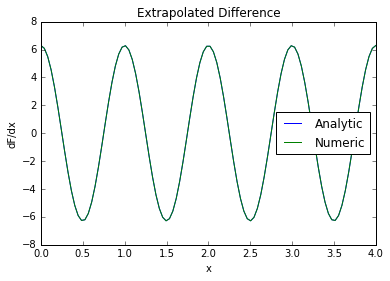

In [101]:
def extrapolated_diff(f, x_min, x_max, h, N):
    x = np.linspace(x_min, x_max, N, h)
    
    a = np.array(central_diff(f, x_min, x_max, h/2, N))
    b = np.array(central_diff(f, x_min, x_max, h, N))
    y = (4*a-b)/3

    y = np.array(y)
    true_derivative = 2*np.pi*np.cos(2*np.pi*x)
    
    error = abs(true_derivative - y)
    print('Max Error, h =:', h, max(error))    
    
    # The second argument here is the actual dh/dx function.
    plt.plot(x, true_derivative, label='Analytic')
    plt.plot(x, y, label='Numeric')
    plt.xlabel('x')
    plt.ylabel('dF/dx')
    plt.title('Extrapolated Difference')
    plt.legend(loc='best')
    plt.show()
    
extrapolated_diff(F, 0, 4, 0.1, 100)

There is a shift in the forward difference graph, because the data points we are using to calculate slopes are not centered around the point of interest. 

h= 0.00001 gives error less than 0.001

There is no shift in the central difference graph because the points we use are centered around the point of interest. 

h = 0.01 makes the error almost less than 0.001

This is also true for the extrapolated difference graph since it is based off the central difference.

h = 0.1 makes the error almost less than 0.001

### Problem 2: Second Derivatives
Use
$$
\frac{d^2f(x)}{dt^2} \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
$$
to numerically evaluate the second derivative of functions in the parts below. In each case, write a function to plot the second derivative and the error relative to the analytical result with $N$ points and step $h$ over the range $[x_i, x_f]$ indicated.

a. $f(x) = 3 x^2$ over the range $[0, 10]$.  
* What is special about this result?

b. $f(x) = 5 \tan(x)$ over the range $(-\pi/2, \pi/2)$.  
* What can be the problem with this result?
* What restrictions can you place to avoid this problem?

c. The Heaviside step function:
$$
f(x) = \begin{cases}
0 & \text{if $x < 0$,} \\
1 &\text{if $x\geq 0$.}
\end{cases}
$$
Over the range $[-1, 1]$.

* Does your result make sense?  
* What is the problem with this second derivative?

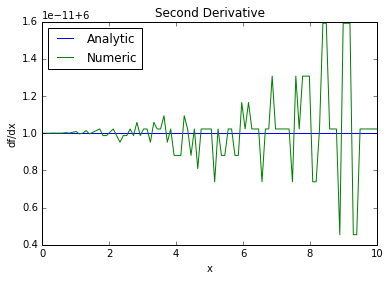

In [80]:
import numpy as np

def F1(x):
    return 3*x**2

def F1_prime_prime(x):
    return 6*np.ones(len(x))

def F2(x):
    return np.tan(x)

def F2_prime_prime(x):
    return 2*np.tan(x)/np.cos(x)**2

def F3(x):
    if x < 0:
        return 0
    return 1

# The heaviside function's derivative is the Driac delta function, and the derivative of the
# delta function is...? I made this function to capture the general behavior of the heaviside
# function's second derivative
def F3_prime_prime(x):
    y = [ ]
    for i in range(len(x)):
        if x[i] < 0.01 and x[i] > -0.01:
            y.append(inf)
        else:
            y.append(0)
    return y

def second_derivative(f, f_prime_prime, x_min, x_max, h, N):
    x = np.linspace(x_min, x_max, N, h)
    y = [ ]
    
    for i in range(len(x)):
        diff_quotient = ( f(x[i] + h) - 2*f(x[i]) + f(x[i] - h) ) / h**2
        y.append(diff_quotient)
    
    plt.plot(x, f_prime_prime(x), label='Analytic')
    plt.plot(x, y, label='Numeric')
    plt.xlabel('x')
    plt.ylabel('df/dx')
    plt.title('Second Derivative')
    plt.legend(loc='best')
    plt.show()

    # part a
second_derivative(F1, F1_prime_prime, 0, 10, 0.1, 100)

The second derivative of this function is a horizontal line, and the error is extremely small.

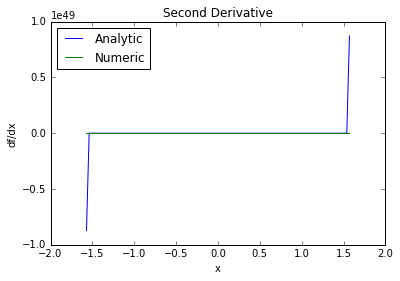

In [73]:
# part b
second_derivative(F2, F2_prime_prime, -np.pi/2, np.pi/2, 0.1, 100)

There are vertical asymptotes at +/- pi/2, so that causes problems when estimating the second derivative. If we chose a smaller interval (one that didn't get too close to +/- pi/2 or any other area with an asymptote), we wouldn't have to deal with this issue.

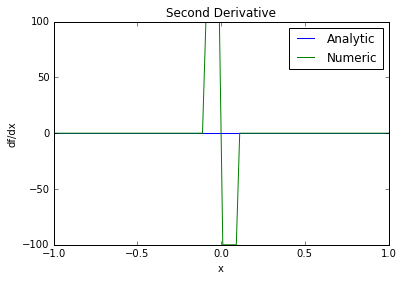

In [82]:
second_derivative(F3, F3_prime_prime, -1, 1, 0.1, 100)

The first derivative is the Dirac delta function, which is zero everywhere with a sigularity at x = 0 in which its value is infinite. The derivative of the delta function is...well I don't really know. But intuitively, it shouldn't be that different than the delta function itself. 

The obvious problem is the sigularity at x = 0. The delta function isn't even a true function; it's a generalized function, and those bad boys don't like to play by the rules.